In [1]:
# 匯入/處理/裁切圖片 getting numpy arrays of pixel values of images.
import os # use directory & join path
import cv2 #opencv library read img operations                  
import numpy as np # array operations
from decimal import Decimal # 精準小數點四捨五路
 
# data visualisation and manipulation
import matplotlib.pyplot as plt #show img and table
import pandas as pd # 匯出 csv

import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [2]:
def splitRGBChannal(img_rgb):
    
    r_channel = []
    g_channel = []
    b_channel = []

    for i in range(len(img_rgb)):
        for j in range(len(img_rgb[0])):

            r_channel.append(img_rgb[i][j][0])
            g_channel.append(img_rgb[i][j][1])
            b_channel.append(img_rgb[i][j][2])

    r_avg = np.array(r_channel).sum() / len(r_channel)
    r_avg = Decimal(r_avg).quantize(Decimal("0.01"), rounding = "ROUND_HALF_UP")

    r_stdev = np.std(r_channel)
    r_stdev = Decimal(r_stdev).quantize(Decimal("0.01"), rounding = "ROUND_HALF_UP")

    g_avg = np.array(g_channel).sum() / len(g_channel)
    g_avg = Decimal(g_avg).quantize(Decimal("0.01"), rounding = "ROUND_HALF_UP")
    
    g_stdev = np.std(g_channel)
    g_stdev = Decimal(g_stdev).quantize(Decimal("0.01"), rounding = "ROUND_HALF_UP")

    b_avg = np.array(b_channel).sum() / len(b_channel)
    b_avg = Decimal(b_avg).quantize(Decimal("0.01"), rounding = "ROUND_HALF_UP")
    
    b_stdev = np.std(b_channel)
    b_stdev = Decimal(b_stdev).quantize(Decimal("0.01"), rounding = "ROUND_HALF_UP")
    
    return r_avg, r_stdev, g_avg, g_stdev, b_avg,b_stdev


In [3]:
def outputMeanStdCsv(img_name, r_avg, r_stdev, g_avg, g_stdev, b_avg,b_stdev):
    MeanStd = [[r_avg , g_avg, b_avg],[r_stdev, g_stdev, b_stdev]]
    MeanStd_table = pd.DataFrame(MeanStd)
    # 去掉副檔名
    img_name = img_name.rstrip(".png") 
    img_name = img_name.rstrip(".jpg")
    # print("img_name",img_name)
    col_name = ['red','green','blue']
    row_name = ['Average','Standard Deviation']
    MeanStd_table.columns = col_name
    MeanStd_table.index = row_name
    #print(MeanStd_table)
    # 匯出 answer table 成 csv 檔
    MeanStd_table.to_csv('result/'+ img_name + '-mean-std.csv')
    

In [4]:
def show_histogram(img_rgb, img_path, img_name):

    plt.figure(figsize=(20,10))

    # 印出圖片
    plt.subplot(231)
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.title("source Name : " + img_name)

    color = ('r', 'g', 'b')
    for i, col in enumerate(color):

        plt.subplot(232)
        # cv2.calcHist(影像, 通道, 遮罩, 區間數量, 數值範圍)
        hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
        plt.plot(hist, color=col)
        plt.title("RGB channel histogram")
        plt.xlabel("RBB value")
        plt.ylabel("frequent")
        plt.xlim([0, 256])

    # red channel
    plt.subplot(234)
    hist_R = cv2.calcHist([img_rgb], [0], None, [256], [0, 256])
    plt.bar(range(1,257), hist_R.ravel(), color='r')
    plt.title("red channel histogram")
    plt.xlabel("R value")
    plt.ylabel("frequent")

    # green channel
    plt.subplot(235)
    hist_G = cv2.calcHist([img_rgb], [1], None, [256], [0, 256])
    plt.bar(range(1,257), hist_G.ravel(), color='g')
    plt.title("green channel histogram")
    plt.xlabel("G value")
    plt.ylabel("frequent")

    plt.subplot(236)
    hist_B = cv2.calcHist([img_rgb], [2], None, [256], [0, 256])
    plt.bar(range(1,257), hist_B.ravel(), color='b')
    plt.title("blue channel histogram")
    plt.xlabel("B value")
    plt.ylabel("frequent")
    
    return hist_R, hist_G, hist_B


In [5]:
def outputHistogramCsv(img_name, hist_R, hist_G, hist_B):
    # hisRGB table array
    hisRGB = []
   
    for i in range(len(hist_R)):
        hisRGB.extend([hist_R[i], hist_G[i], hist_B[i]])
        
    hisRGB = np.array(hisRGB)
    hisRGB = hisRGB.reshape(-1,3)
    
    hisRGB_table = pd.DataFrame(hisRGB)
    # 去掉副檔名
    img_name = img_name.rstrip(".png") 
    img_name = img_name.rstrip(".jpg")
    #print("img_name",img_name)
    
    col_name = ['Red_his','Green_his','Blue_his']
    hisRGB_table.columns = col_name
    #print(hisRGB_table)
    
    # 匯出 answer table 成 csv 檔
    hisRGB_table.to_csv('result/'+ img_name + '-his.csv')
    


圖檔名:  baboon.png
R_channel 平均:  137.39
R_channel 標準差:  55.50

G_channel 平均:  128.86
G_channel 標準差:  47.77

B_channel 平均:  113.12
B_channel 標準差:  61.70

圖檔名:  kodim07.png
R_channel 平均:  117.56
R_channel 標準差:  41.08

G_channel 平均:  110.72
G_channel 標準差:  37.61

B_channel 平均:  85.37
B_channel 標準差:  39.25

圖檔名:  kodim17.png
R_channel 平均:  82.68
R_channel 標準差:  46.94

G_channel 平均:  77.05
G_channel 標準差:  50.11

B_channel 平均:  69.02
B_channel 標準差:  47.93

圖檔名:  peppers.png
R_channel 平均:  149.82
R_channel 標準差:  45.17

G_channel 平均:  115.57
G_channel 標準差:  75.05

B_channel 平均:  66.53
B_channel 標準差:  44.29


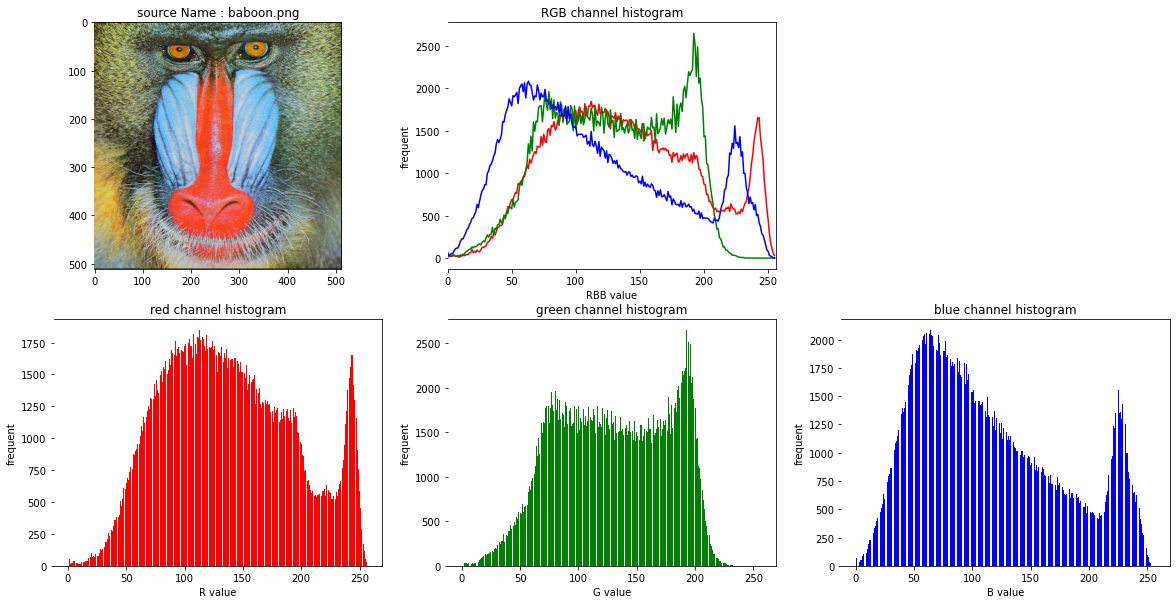

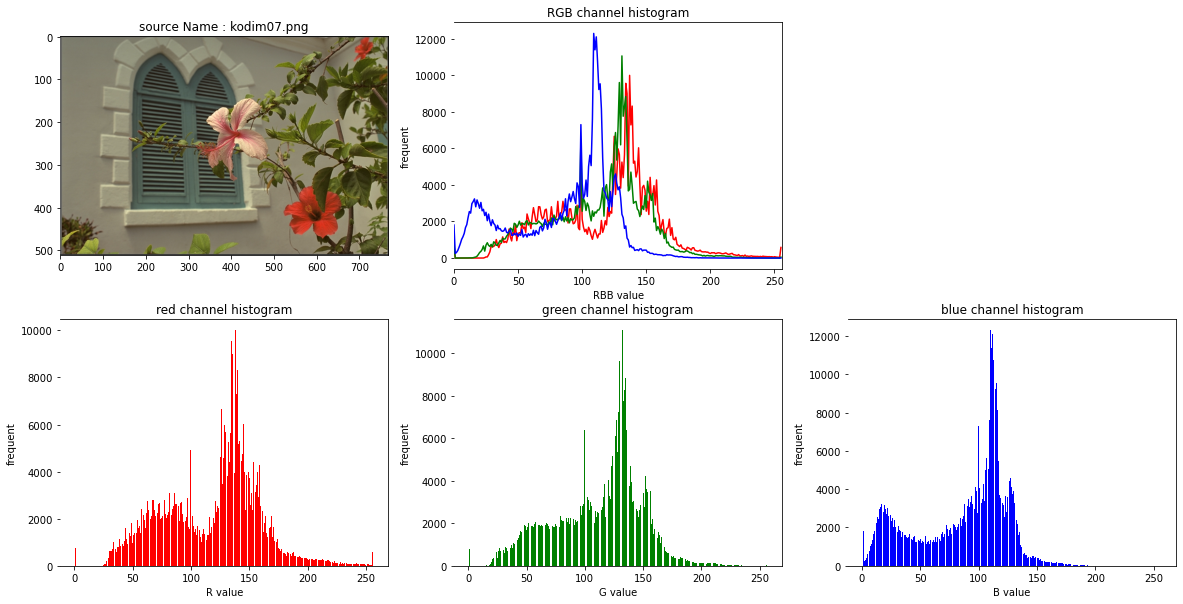

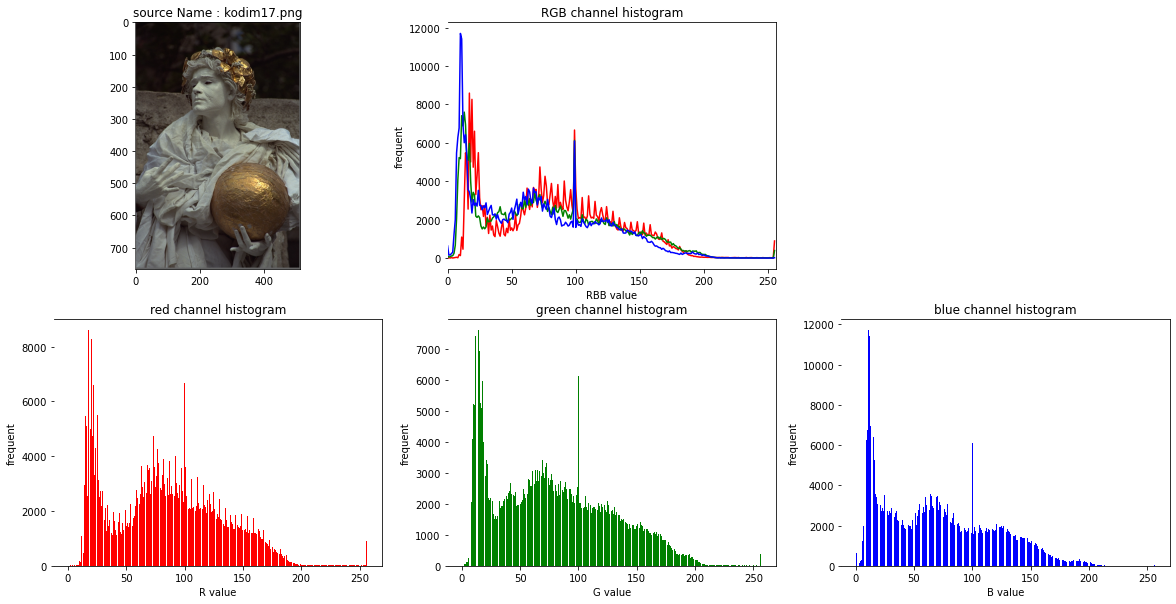

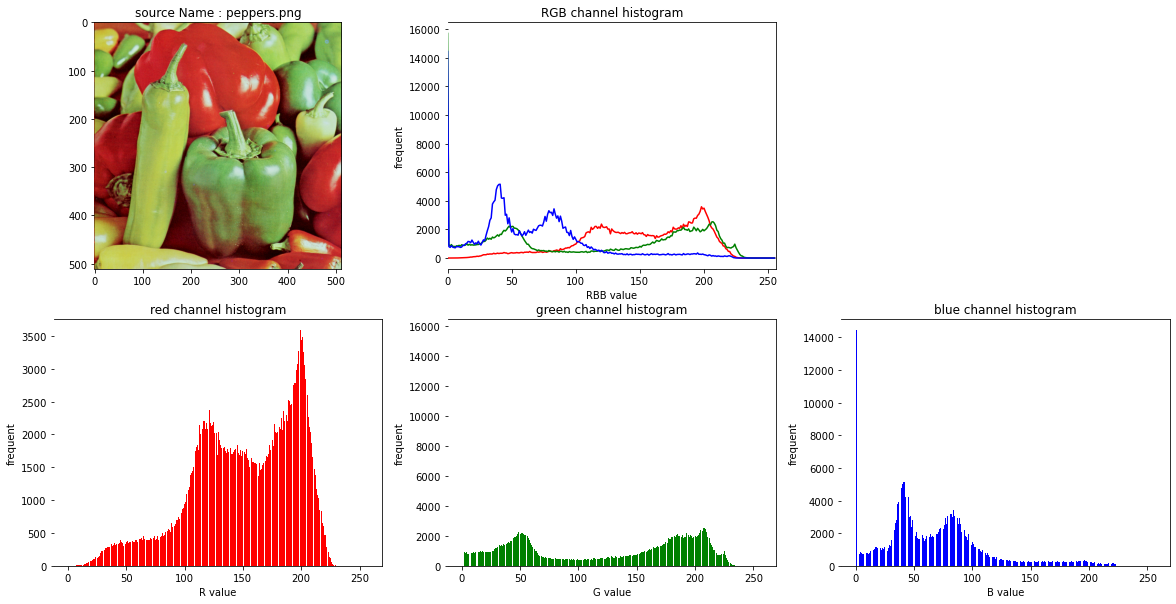

In [6]:
# 印出所有圖片
DATADIR = 'source/'
# 抓目錄下所有圖檔檔名
img_name = os.listdir(DATADIR)
#print(img_name)

for i in range (len(img_name)):
        
        # 圖片完整路徑
        img_path = DATADIR + img_name[i]
        # convert img to array 以彩色格式讀取(三維)
        img_bgr = cv2.imread(img_path ,cv2.IMREAD_COLOR)  
        # 原為 BGR 轉為 RGB
        img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
        
        # 將圖檔切成 RGB Channel
        r_avg, r_stdev, g_avg, g_stdev, b_avg,b_stdev = splitRGBChannal(img_rgb)
        # 匯出平均及標準差成csv
        outputMeanStdCsv(img_name[i], r_avg, r_stdev, g_avg, g_stdev, b_avg,b_stdev)
        
        # 畫值方圖
        hist_R, hist_G, hist_B = show_histogram(img_rgb, img_path, img_name[i])
        # 匯出值方圖數值成csv
        outputHistogramCsv(img_name[i], hist_R, hist_G, hist_B)
        
        
        print("\n圖檔名: ", img_name[i])
        print("R_channel 平均: ", r_avg)
        print("R_channel 標準差: ", r_stdev)
        print("\nG_channel 平均: ", g_avg)
        print("G_channel 標準差: ", g_stdev)
        print("\nB_channel 平均: ", b_avg)
        print("B_channel 標準差: ", b_stdev)
        